In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Loan=pd.read_csv('loan.csv')
Applicant=pd.read_csv('applicant.csv')

## Data Checking

In [ ]:
Loan.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


In [ ]:
Applicant.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac


In [ ]:
## Merge data 
loandata = pd.merge(Loan, Applicant,on="applicant_id")

In [ ]:
loandata.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac


In [ ]:
loandata.shape

(1000, 27)

In [ ]:
## Check column in dataset
loandata.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [ ]:
##  Some Mathametical information
loandata.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000,75.000000,2.000000,4.000000,1.000000


In [ ]:
## How many columns in the dataset
print("Column of the dataset is",len(loandata.columns))

Column of the dataset is 27


In [ ]:
## How many rows in the dataset
print("Rows of dataset is",len(loandata))

Rows of dataset is 1000


In [ ]:
## Check the data type of all columns
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

In [ ]:
## Check some unique value in categorical column
loandata["Gender"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
loandata["Marital_status"].unique()

array(['single', 'divorced/separated/married', 'divorced/separated',
       'married/widowed'], dtype=object)

In [ ]:
loandata["Loan_history"].unique()

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)

In [ ]:
loandata["Property"].unique()

array(['real estate', 'building society savings agreement/life insurance',
       nan, 'car or other'], dtype=object)

In [ ]:
loandata["Purpose"].unique()

array(['electronic equipment', 'education', 'FF&E', 'new vehicle',
       'used vehicle', 'business', 'domestic appliances', 'repair costs',
       nan, 'career development'], dtype=object)

## Data Cleaning 

In [ ]:
## Check null values
loandata.isnull().sum()

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

## Handling null values 

In [ ]:
loandata["Purpose"].fillna(method="ffill",inplace=True)

In [ ]:
loandata["Property"].fillna( method ='ffill', inplace = True)

In [ ]:
loandata["Savings_account_balance"].fillna( method ='bfill', inplace = True)

In [ ]:
## Split column 
new = loandata["Has_been_employed_for_at_least"].str.split(" ", n = 1, expand = True)
loandata["AtleastEmpYear"]= new[0]

In [ ]:
loandata["AtleastEmpYear"].fillna( method ='ffill', inplace = True)

In [ ]:
new = loandata["Has_been_employed_for_at_most"].str.split(" ", n = 1, expand = True)
loandata["AtmostEmpYear"]= new[0]
loandata["AtmostEmpYear"].fillna( method ='ffill', inplace = True)

In [ ]:
loandata["AtmostEmpYear"].fillna(method="ffill",inplace=True)

In [ ]:
loandata.isnull().sum()

loan_application_id                                           0
applicant_id                                                  0
Months_loan_taken_for                                         0
Purpose                                                       0
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                      0
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                          

## Droping unnecessary columns

In [ ]:
loandata=loandata.drop(['Has_been_employed_for_at_most','Has_been_employed_for_at_least','Telephone','Balance_in_existing_bank_account_(lower_limit_of_bucket)' ,
'Balance_in_existing_bank_account_(upper_limit_of_bucket)','Other_EMI_plans' ],axis=1)

In [ ]:
loandata.isnull().sum()

loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
Primary_applicant_age_in_years                 0
Gender                                         0
Marital_status                                 0
Number_of_dependents                           0
Housing                                        0
Years_at_current_residence                     0
Employment_status                              0
Foreign_worker                                 0
Savings_account_bala

## EDA(Exploratry Data Analysis)

In [ ]:
### Number of existing loan at this bank
existing_loan_at_bank=loandata["Number_of_existing_loans_at_this_bank"].sum()
existing_loan_at_bank

1407

In [ ]:
## find out the existing loan at this bank in martial status 
marital_status_existing_loan=loandata.groupby("Marital_status")["Number_of_existing_loans_at_this_bank"].sum().sort_values(ascending=False)
marital_status_existing_loan.reset_index()

,Marital_status,Number_of_existing_loans_at_this_bank
0,single,805
1,divorced/separated/married,411
2,married/widowed,124
3,divorced/separated,67


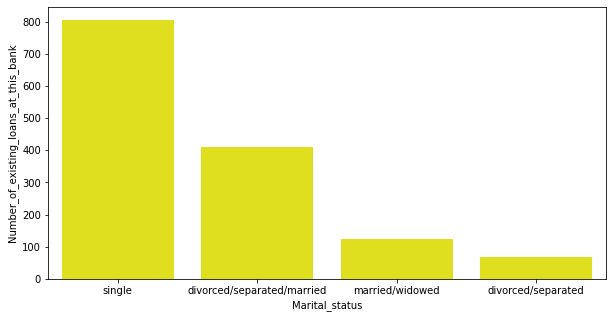

In [ ]:
## Visulaization Marital existing loan at this bank
plt.figure(figsize=(10,5))
sns.barplot(x="Marital_status",y="Number_of_existing_loans_at_this_bank",data=marital_status_existing_loan.reset_index(),color='yellow')
plt.xlabel("Marital_status")
plt.show()

In [ ]:
## In which purpose the max loan amount is used
max_loan_purpose= loandata.groupby("Purpose")["Principal_loan_amount"].max().sort_values(ascending=False)
max_loan_purpose.reset_index()

,Purpose,Principal_loan_amount
0,business,18424000
1,electronic equipment,15857000
2,new vehicle,14896000
3,FF&E,14179000
4,used vehicle,12976000
5,education,12612000
6,repair costs,11998000
7,domestic appliances,3990000
8,career development,3447000


<AxesSubplot:xlabel='Purpose', ylabel='Principal_loan_amount'>

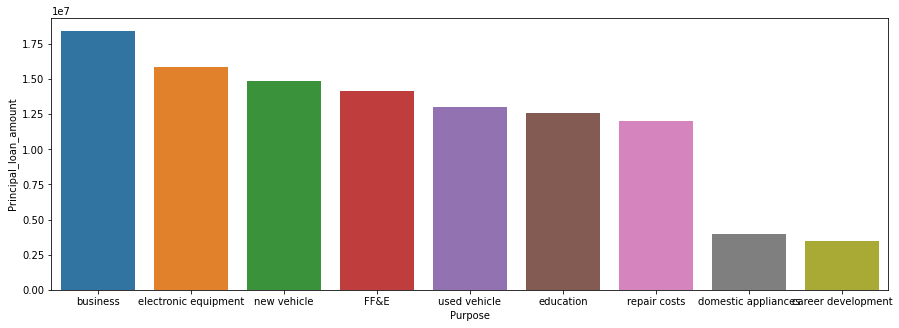

In [ ]:
## Visulaization
plt.figure(figsize=(15,5))
sns.barplot(x="Purpose",y="Principal_loan_amount",data=max_loan_purpose.reset_index())

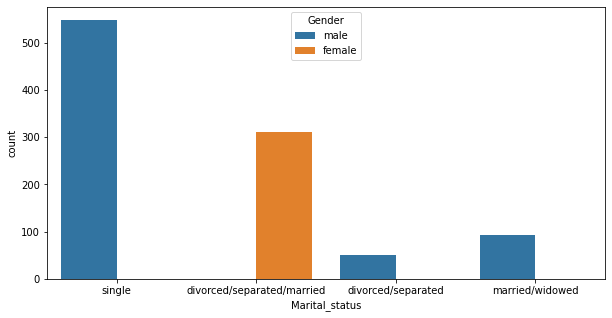

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Marital_status",data=loandata,hue="Gender")
plt.show()

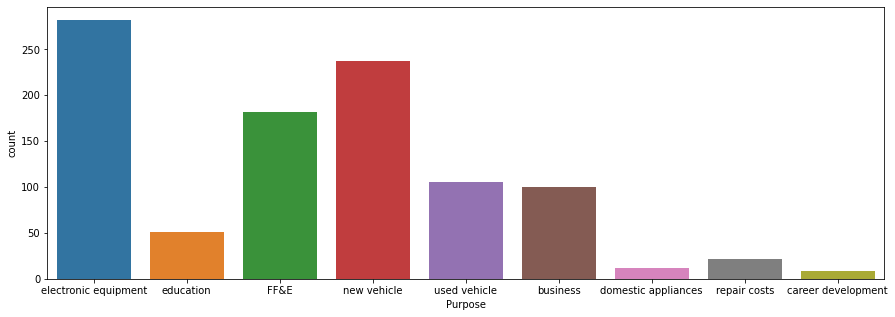

In [ ]:
## In which Purpose How many time loan were given by bank
plt.figure(figsize=(15,5))
sns.countplot(x="Purpose",data=loandata)
plt.show()

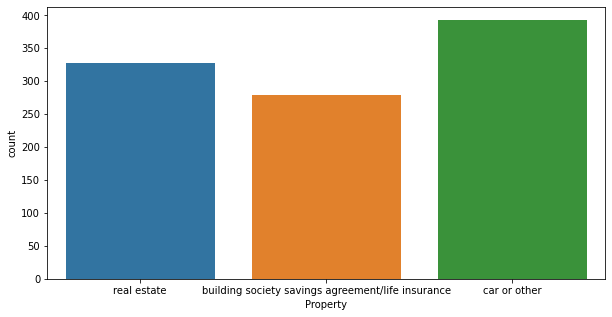

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Property",data=loandata)
plt.show()

In [ ]:
loandata.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Savings_account_balance', 'AtleastEmpYear', 'AtmostEmpYear'],
      dtype='object')

<AxesSubplot:xlabel='high_risk_applicant', ylabel='count'>

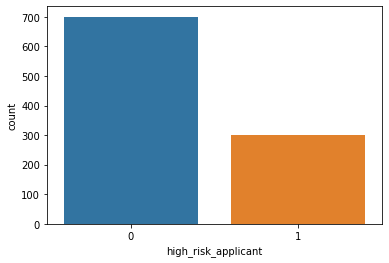

In [ ]:
sns.countplot(x="high_risk_applicant",data=loandata)

<AxesSubplot:xlabel='Number_of_dependents', ylabel='count'>

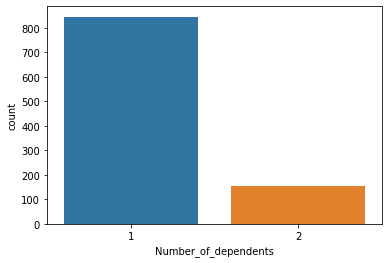

In [ ]:
sns.countplot(x="Number_of_dependents",data=loandata)

In [ ]:
loandata.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,...,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,AtleastEmpYear,AtmostEmpYear
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,...,male,single,1,own,4,skilled employee / official,1,Low,7,NaN
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,...,female,divorced/separated/married,1,own,2,skilled employee / official,1,Low,1,4


<AxesSubplot:xlabel='Purpose', ylabel='Principal_loan_amount'>

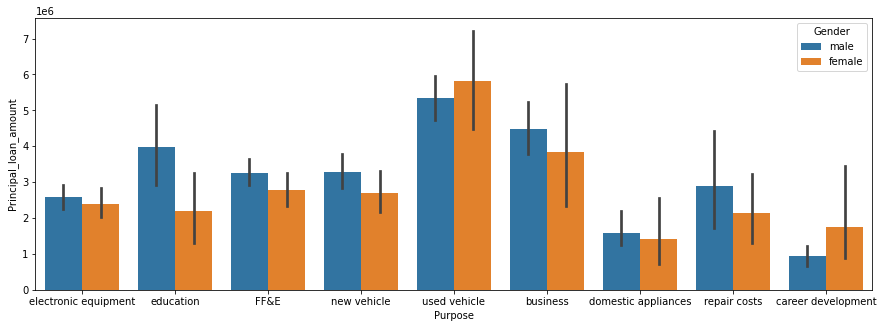

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x="Purpose",y="Principal_loan_amount",data=loandata
,hue="Gender")

<AxesSubplot:xlabel='high_risk_applicant', ylabel='Principal_loan_amount'>

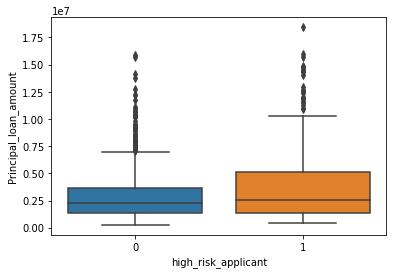

In [ ]:
sns.boxplot(x="high_risk_applicant",y="Principal_loan_amount",data=loandata)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


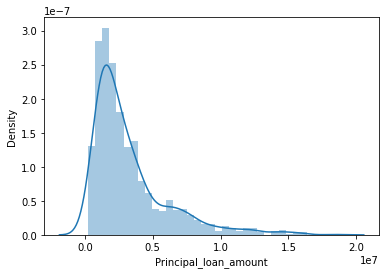

In [ ]:
sns.distplot(loandata["Principal_loan_amount"])
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


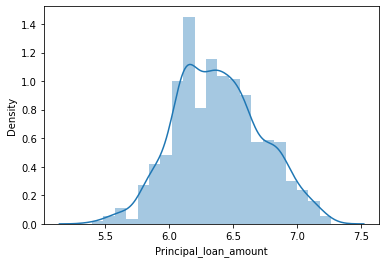

In [ ]:
sns.distplot(np.log10(loandata["Principal_loan_amount"]))
plt.show()

In [ ]:
Low_risk=loandata[loandata["high_risk_applicant"]==0]


In [ ]:
Low_risk.groupby("Gender")["high_risk_applicant"].value_counts().sort_values(ascending=False)

Gender  high_risk_applicant
male    0                      499
female  0                      201
Name: high_risk_applicant, dtype: int64

In [ ]:
high_risk=loandata[loandata["high_risk_applicant"]==1]

In [ ]:
high_risk.groupby("Gender")["high_risk_applicant"].value_counts().sort_values(ascending=False)

Gender  high_risk_applicant
male    1                      191
female  1                      109
Name: high_risk_applicant, dtype: int64

In [ ]:
pie=loandata.groupby("Gender")["high_risk_applicant"].value_counts().sort_values(ascending=False)


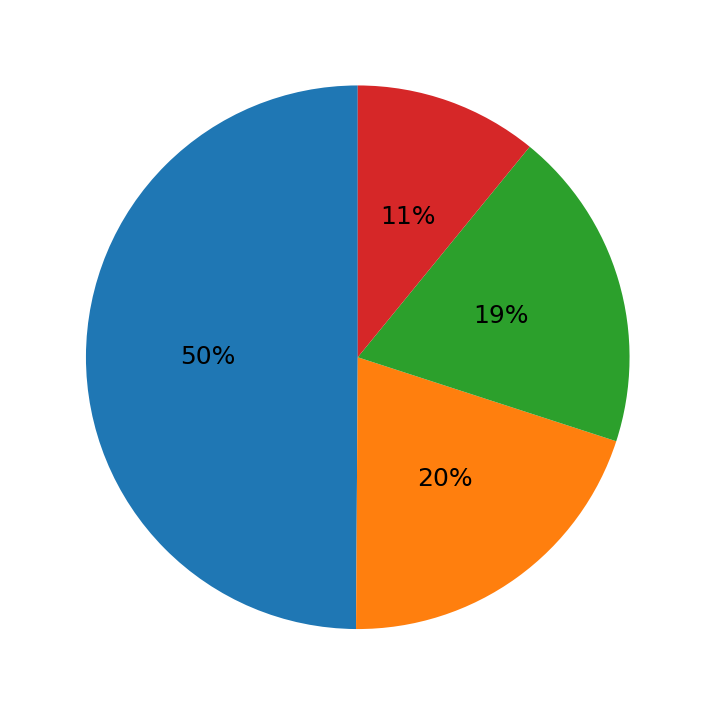

In [ ]:
plt.figure(figsize=(10,5),dpi=180)
plt.pie(pie,normalize=True,autopct='%.0f%%',pctdistance=0.55,textprops=None
,frame=False,labeldistance=1.2,counterclock=True,startangle=90)
plt.show()

In [ ]:
df=pie.reset_index

In [ ]:
df=pd.DataFrame(pie)

In [ ]:
df.rename(columns={"high_risk_applicant":"Value_counts"},inplace=True)

In [ ]:
df.reset_index()

,Gender,high_risk_applicant,Value_counts
0,male,0,499
1,female,0,201
2,male,1,191
3,female,1,109


In [ ]:
df1=df.reset_index()

In [ ]:
df1

,Gender,high_risk_applicant,Value_counts
0,male,0,499
1,female,0,201
2,male,1,191
3,female,1,109


<AxesSubplot:xlabel='high_risk_applicant', ylabel='Value_counts'>

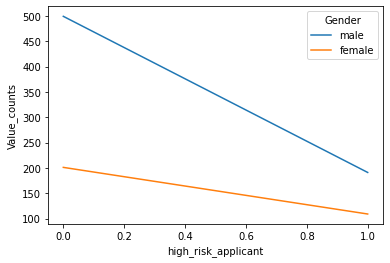

In [ ]:
sns.lineplot(x="high_risk_applicant",y="Value_counts",data=df1,hue="Gender")

In [ ]:
max_loan_amount=loandata.groupby("Gender")["Principal_loan_amount"].max().reset_index()

In [ ]:
max_loan_amount


,Gender,Principal_loan_amount
0,female,18424000
1,male,15945000


<AxesSubplot:xlabel='Principal_loan_amount', ylabel='high_risk_applicant'>

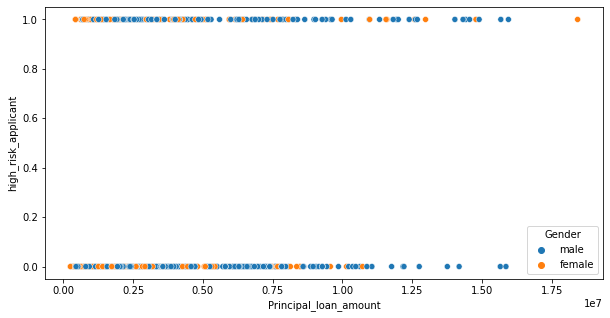

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Principal_loan_amount",y="high_risk_applicant",data=loandata,hue="Gender")

In [ ]:
df2=loandata.groupby("Property")["high_risk_applicant"].value_counts()
df2

Property                                           high_risk_applicant
building society savings agreement/life insurance  0                      188
                                                   1                       91
car or other                                       0                      265
                                                   1                      128
real estate                                        0                      247
                                                   1                       81
Name: high_risk_applicant, dtype: int64

<AxesSubplot:xlabel='high_risk_applicant', ylabel='count'>

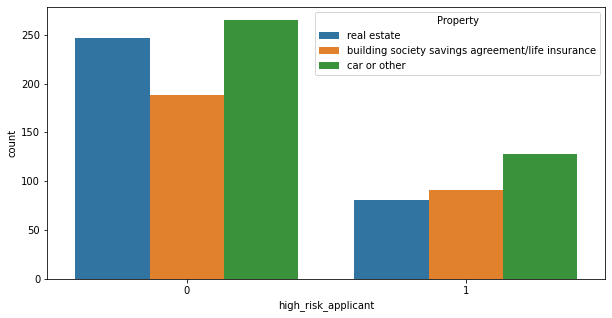

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="high_risk_applicant",hue="Property",data=loandata)

In [ ]:
loandata.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Savings_account_balance', 'AtleastEmpYear', 'AtmostEmpYear'],
      dtype='object')

In [ ]:
loandata["Employment_status"].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management / self-employed / highly qualified employee / officer',
       'unemployed / unskilled - non-resident'], dtype=object)

In [ ]:
## Propert and employment_status wise max loan amount given by bank
max_loan_amount=loandata.groupby(["Property","Employment_status"])["Principal_loan_amount"].max().reset_index()
max_loan_amount

,Property,Employment_status,Principal_loan_amount
0,building society savings agreement/life insurance,management / self-employed / highly qualified ...,18424000
1,building society savings agreement/life insurance,skilled employee / official,12612000
2,building society savings agreement/life insurance,unemployed / unskilled - non-resident,14555000
3,building society savings agreement/life insurance,unskilled - resident,9857000
4,car or other,management / self-employed / highly qualified ...,15857000
5,car or other,skilled employee / official,15672000
6,car or other,unemployed / unskilled - non-resident,3590000
7,car or other,unskilled - resident,11590000
8,real estate,management / self-employed / highly qualified ...,14896000
9,real estate,skilled employee / official,15945000


<AxesSubplot:xlabel='Employment_status', ylabel='Principal_loan_amount'>

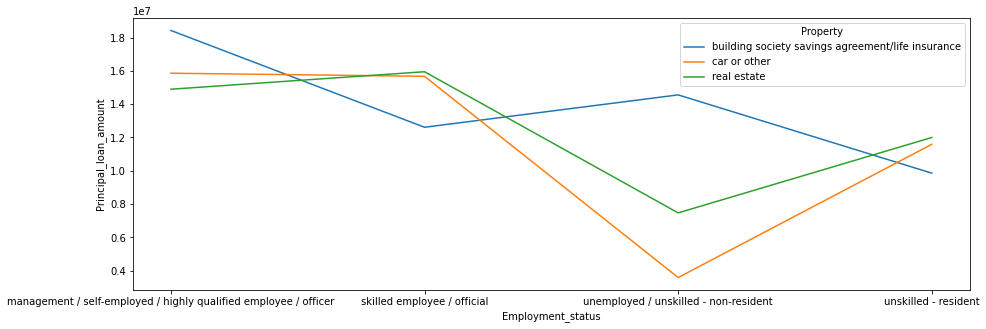

In [ ]:
## Visualization
plt.figure(figsize=(15,5))
sns.lineplot(x='Employment_status',y="Principal_loan_amount",data=max_loan_amount,hue="Property")

In [ ]:
## Propert and employment_status wise avg_loan amount given by bank
avg_loan_amount=loandata.groupby(["Property","Employment_status"])["Principal_loan_amount"].mean().reset_index().round()
avg_loan_amount

,Property,Employment_status,Principal_loan_amount
0,building society savings agreement/life insurance,management / self-employed / highly qualified ...,5157590.0
1,building society savings agreement/life insurance,skilled employee / official,3123888.0
2,building society savings agreement/life insurance,unemployed / unskilled - non-resident,3901200.0
3,building society savings agreement/life insurance,unskilled - resident,2735339.0
4,car or other,management / self-employed / highly qualified ...,5451551.0
5,car or other,skilled employee / official,3556684.0
6,car or other,unemployed / unskilled - non-resident,2153333.0
7,car or other,unskilled - resident,2348302.0
8,real estate,management / self-employed / highly qualified ...,5744710.0
9,real estate,skilled employee / official,2321373.0


<AxesSubplot:xlabel='Employment_status', ylabel='Principal_loan_amount'>

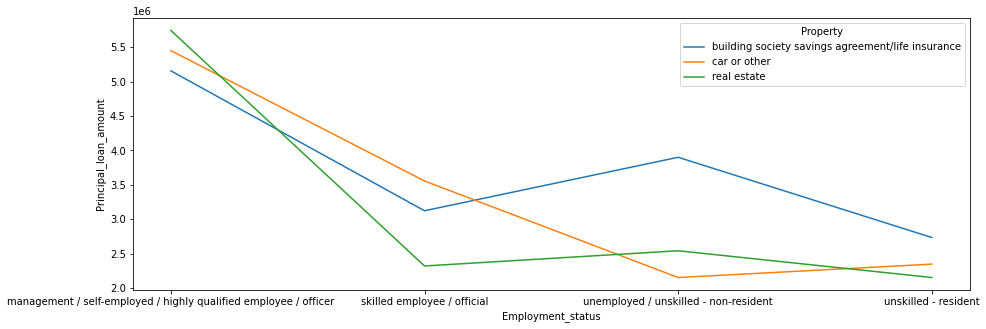

In [ ]:
##Visulaiztaion
plt.figure(figsize=(15,5))
sns.lineplot(x='Employment_status',y="Principal_loan_amount",data=avg_loan_amount,hue="Property")

In [ ]:
loandata["Loan_history"].unique()

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)

In [ ]:
Loan_history_approved=loandata.groupby("Loan_history")["high_risk_applicant"].value_counts()

In [ ]:
Loan_history_approved=pd.DataFrame(Loan_history_approved)

In [ ]:
Loan_history_approved

high_risk_applicant
Loan_history                            high_risk_applicant                     
all loans at this bank paid back duly   1                                     28
                                        0                                     21
critical/pending loans at other banks   0                                    243
                                        1                                     50
delay in paying off loans in the past   0                                     60
                                        1                                     28
existing loans paid back duly till now  0                                    361
                                        1                                    169
no loans taken/all loans paid back duly 1                                     25
                                        0                                     15

In [ ]:
Loan_history_approved

high_risk_applicant
Loan_history                            high_risk_applicant                     
all loans at this bank paid back duly   1                                     28
                                        0                                     21
critical/pending loans at other banks   0                                    243
                                        1                                     50
delay in paying off loans in the past   0                                     60
                                        1                                     28
existing loans paid back duly till now  0                                    361
                                        1                                    169
no loans taken/all loans paid back duly 1                                     25
                                        0                                     15

In [ ]:
approved=Loan_history_approved[Loan_history_approved["high_risk_applicant"]==0]
approved

,,high_risk_applicant
Loan_history,high_risk_applicant,


In [ ]:
Loan_history_rejected=loandata[loandata["high_risk_applicant"]==1]

In [ ]:
Loan_history_rejected=Loan_history_rejected.groupby("Loan_history")["high_risk_applicant"].value_counts()

In [ ]:
Loan_history_rejected=pd.DataFrame(Loan_history_rejected)

In [ ]:
Loan_history_rejected

,,high_risk_applicant
Loan_history,high_risk_applicant,
all loans at this bank paid back duly,1,28
critical/pending loans at other banks,1,50
delay in paying off loans in the past,1,28
existing loans paid back duly till now,1,169
no loans taken/all loans paid back duly,1,25


In [ ]:
Loan_history_rejected

,,high_risk_applicant
Loan_history,high_risk_applicant,
all loans at this bank paid back duly,1,28
critical/pending loans at other banks,1,50
delay in paying off loans in the past,1,28
existing loans paid back duly till now,1,169
no loans taken/all loans paid back duly,1,25


In [ ]:
rejected=Loan_history_rejected["high_risk_applicant"]

In [ ]:
rejected

Loan_history                             high_risk_applicant
all loans at this bank paid back duly    1                       28
critical/pending loans at other banks    1                       50
delay in paying off loans in the past    1                       28
existing loans paid back duly till now   1                      169
no loans taken/all loans paid back duly  1                       25
Name: high_risk_applicant, dtype: int64

In [ ]:
loandata.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,...,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Foreign_worker,Savings_account_balance,AtleastEmpYear,AtmostEmpYear
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,2,...,male,single,1,own,4,skilled employee / official,1,Low,7,NaN
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,1,...,female,divorced/separated/married,1,own,2,skilled employee / official,1,Low,1,4


In [ ]:
### Number of  loan at this bank in gender wise
gender_existing_loan=loandata.groupby("Gender")["Number_of_existing_loans_at_this_bank"].sum().sort_values(ascending=False)
gender_existing_loan


Gender
male      996
female    411
Name: Number_of_existing_loans_at_this_bank, dtype: int64

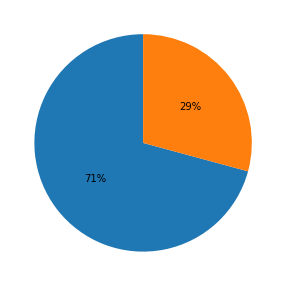

In [ ]:
## Visulaization gender existing loan at this bank percent wise 
plt.figure(figsize=(10,5))
label=["male","female"]
plt.pie(gender_existing_loan,normalize=True,autopct='%.0f%%',pctdistance=0.55,textprops=None
,frame=False,labeldistance=1.2,counterclock=True,startangle=90)
plt.show()

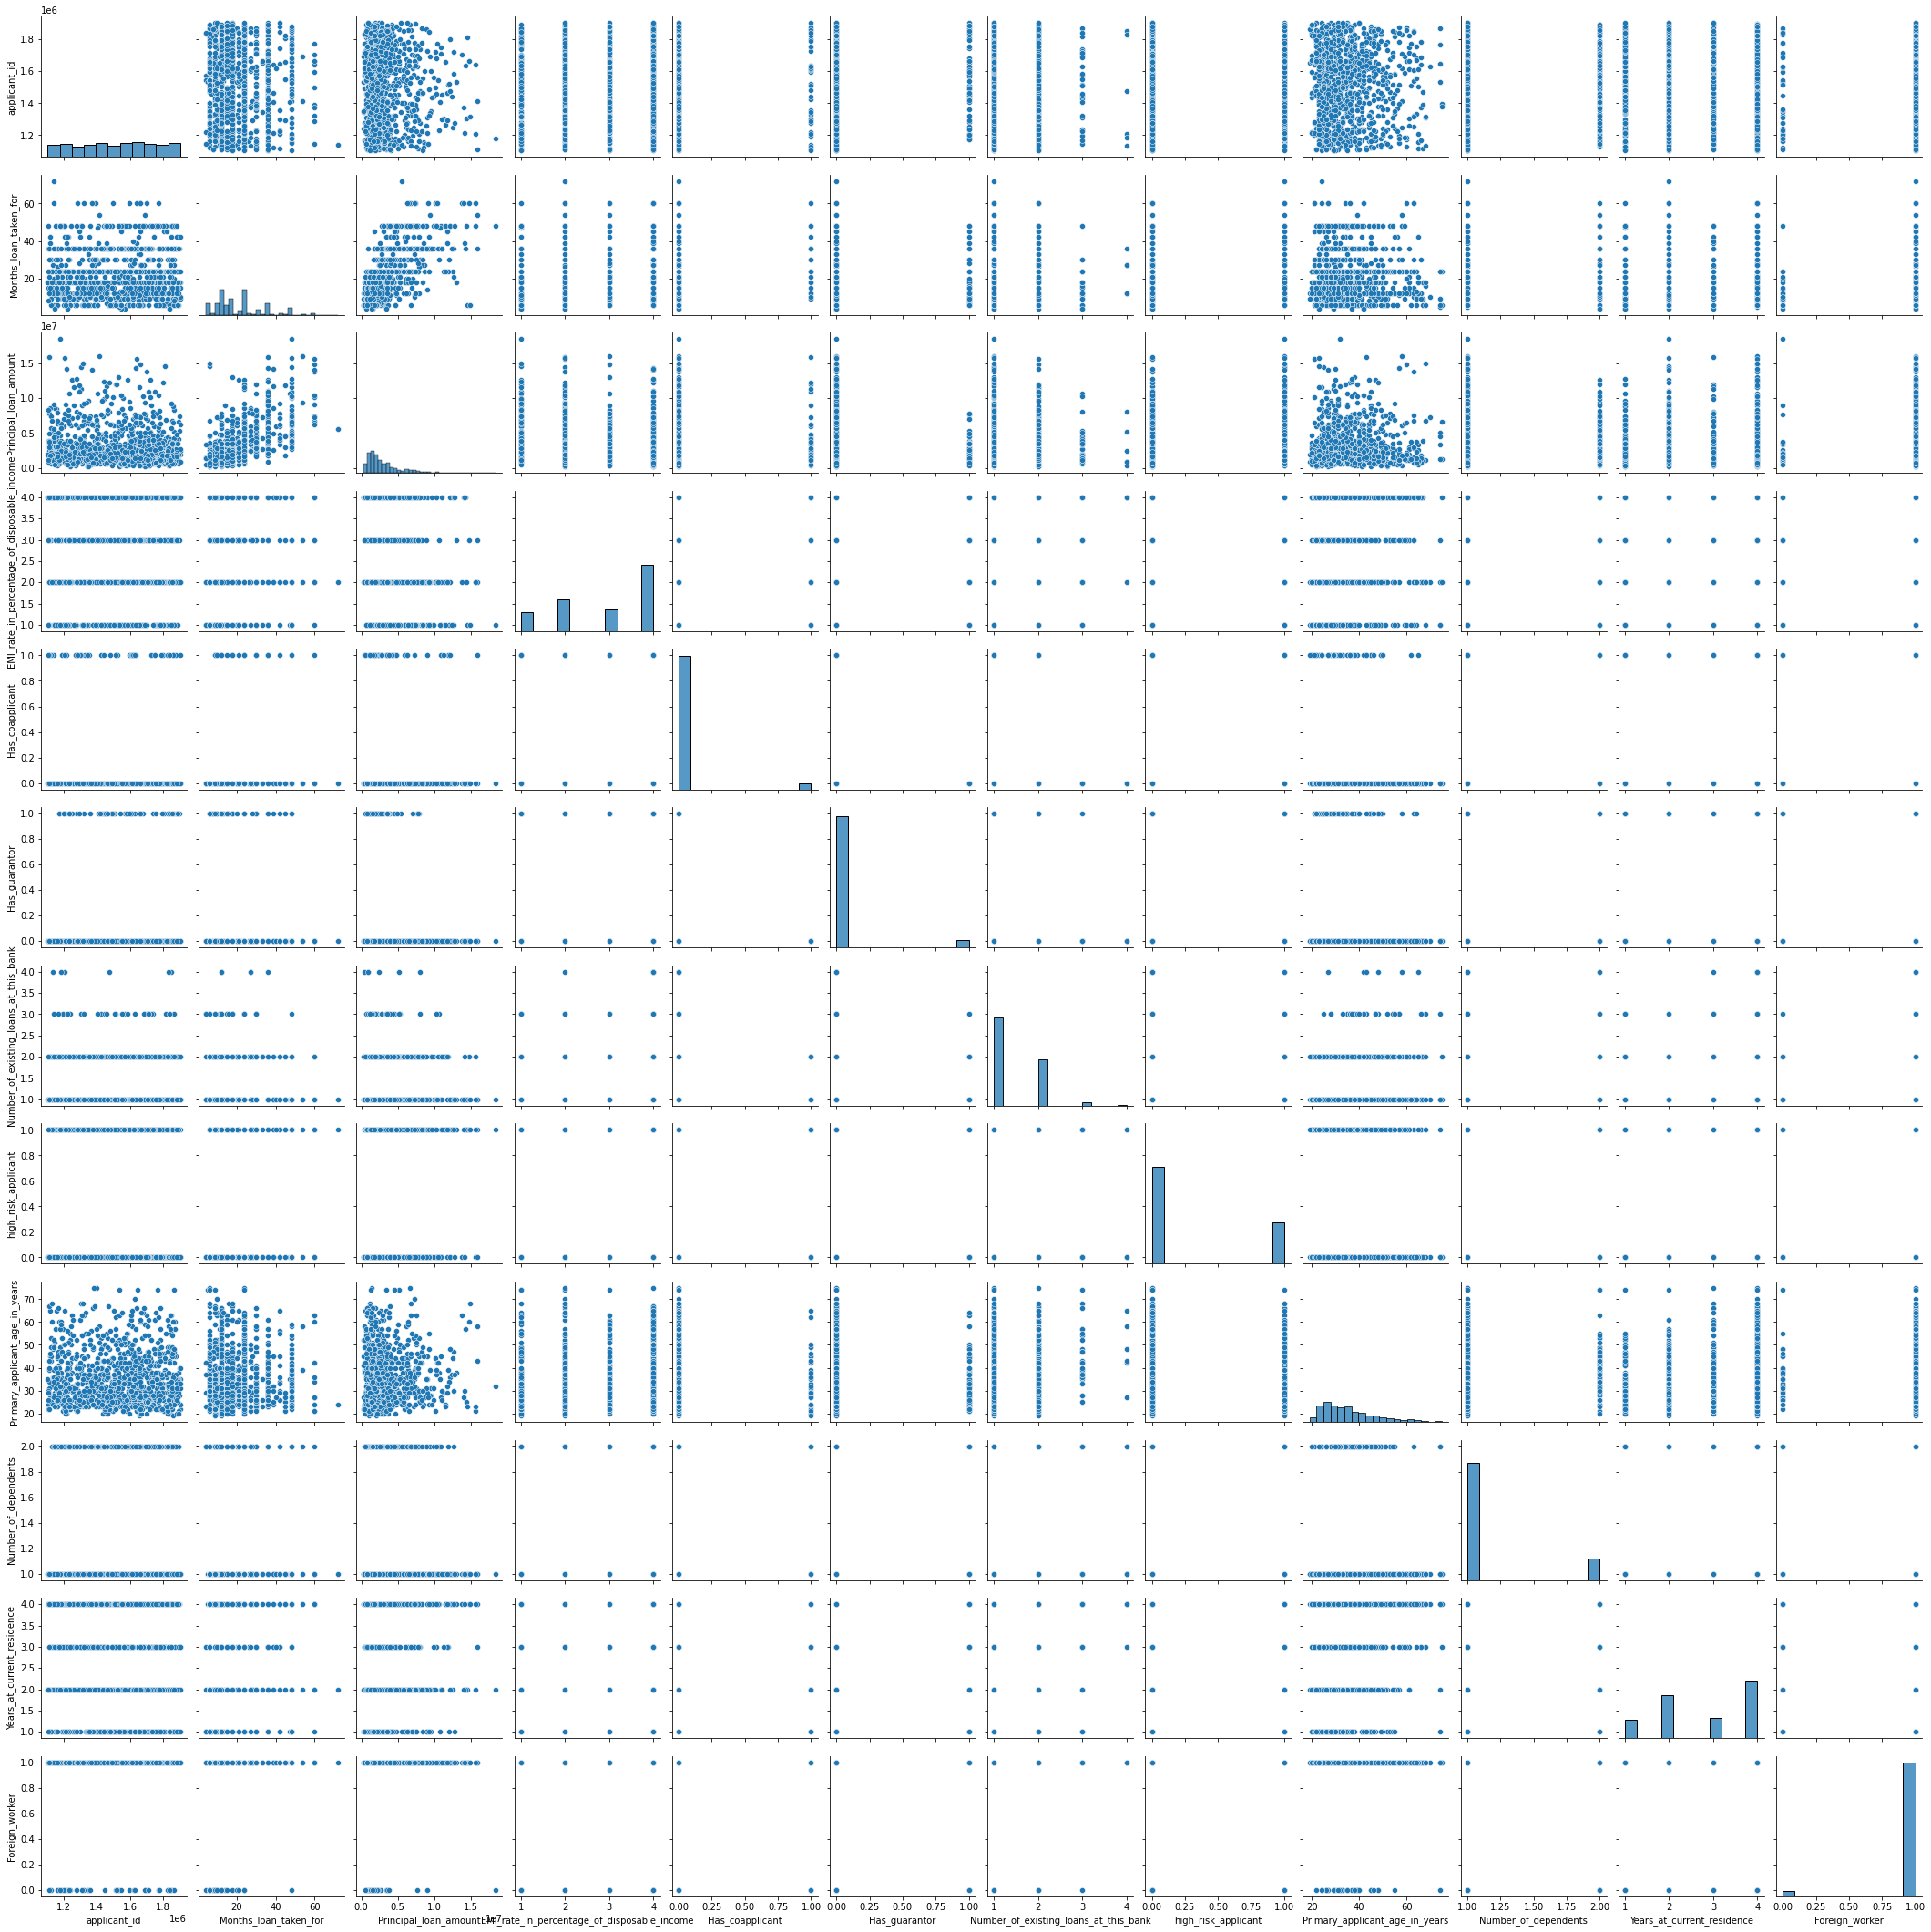

In [ ]:
## Full data relationship
sns.pairplot(loandata)
plt.show()

In [ ]:
loandata["Percent"]=(loandata["Principal_loan_amount"]/loandata["Principal_loan_amount"].sum())*100

In [ ]:
loandata.groupby("Property")["Percent"].sum().round()

Property
building society savings agreement/life insurance    29.0
car or other                                         45.0
real estate                                          26.0
Name: Percent, dtype: float64

In [ ]:
## How many percent loan given high_risk_applicant by bank
loandata.groupby("high_risk_applicant")["Percent"].sum().round().sort_values(ascending=False)


high_risk_applicant
0    64.0
1    36.0
Name: Percent, dtype: float64